# A Simple Introduction to ANOVA  

**Analysis of variance (ANOVA)** is a statistical technique that is used to check if the means of two or more groups are significantly different from each other. ANOVA checks the impact of one or more factors by comparing the means of different samples.

We can use ANOVA to prove/disprove if attendance group has an impact on the increase in SAT scores.

## Terminologies related to ANOVA you need to know


### Grand Mean

There are two kinds of means that we use in ANOVA calculations, which are separate sample means ($\mu_1, \mu_2, \mu_3$) and the grand mean $\mu$  . The grand mean is the mean of sample means or the mean of all observations combined, irrespective of the sample.

### Hypothesis

The Null hypothesis in ANOVA is valid when all the sample means are equal, or they don’t have any significant difference. Thus, they can be considered as a part of a larger set of the population. On the other hand, the alternate hypothesis is valid when at least one of the sample means is different from the rest of the sample means. In mathematical form, they can be represented as:

$H_0: \mu_1 = \mu_2 = \mu_3 ...$

$H_a: \mu_1 \neq \mu_m $

In other words, the null hypothesis states that all the sample means are equal or the factor did not have any significant effect on the results. Whereas, the alternate hypothesis states that at least one of the sample means is different from another.  

We still can’t tell which one specifically. For that, we will use other methods that we will discuss later in this article.

### Between Group Variability

Consider the distributions of the below two samples. As these samples overlap, their individual means won’t differ by a great margin. Hence the difference between their individual means and grand mean won’t be significant enough.

<img src="img/between.png" width="300"/>

As the samples differ from each other by a big margin, their individual means would also differ. The difference between the individual means and grand mean would therefore also be significant.

<img src="img/very_different.png" width="300"/>

Such variability between the distributions called Between-group variability. It refers to variations between the distributions of individual groups (or levels) as the values within each group are different.

<img src="img/comparison_within.png" width="400"/>

We multiply each squared deviation by each sample size and add them up. This is called the **sum-of-squares for between-group variability*.* 

<img src="img/ss_between.png" width="400"/>

For our between-group variability, we will find each squared deviation, weigh them by their sample size, sum them up, and divide by the degrees of freedom, which in the case of between-group variability is the number of sample means (k) minus 1.

<img src="img/ms_between.png" width="400"/>

### Within Group Variability

<img src="img/within_group.png" width="400"/>

Such variations within a sample are denoted by Within-group variation. It refers to variations caused by differences within individual groups (or levels) as not all the values within each group are the same. Each sample is looked at on its own and variability between the individual points in the sample is calculated.


We can measure Within-group variability by looking at how much each value in each sample differs from its respective sample mean. So first, we’ll take the squared deviation of each value from its respective sample mean and add them up. This is the sum of squares for within-group variability.

<img src="img/ss_within.png" width="500"/>


Like between-group variability, we then divide the sum of squared deviations by the degrees of freedom  to find a less-biased estimator for the average squared deviation. 

<img src="img/df_within.png" width="700"/>

<img src="img/ms_within.png" width="400"/>


## F-Statistic

The statistic which measures if the means of different samples are significantly different or not is called the F-Ratio. Lower the F-Ratio, more similar are the sample means.

#### F = Between group variability / Within group variability



<img src="img/betweeN_and_within.png" width="400"/>


This F-statistic calculated here is compared with the F-critical value for making a conclusion. If the value of the calculated F-statistic is more than the F-critical value (for a specific α/significance level), then we reject the null hypothesis and can say that the treatment had a significant effect.

In [3]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
data = pd.read_csv('data/bikeshare_day.csv')
data.head()
# cnt is the outcome we are trying to predict

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


| Variable name    | Description 
|:--------|:-------------------------------------------------------------
| `instant`		| record index
| `dteday` 		| date
| `season` 		| season (1:winter, 2:spring, 3:summer, 4:fall)
| `yr` 		    | year (0: 2011, 1:2012)
| `mnth` 		  | month (1 to 12)
| `holiday` 	| weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
| `weekday` 	| day of the week
| `workingday`| if day is neither weekend nor holiday is 1, otherwise is 0.
| `weathersit`| 1: Clear, Few clouds, Partly cloudy, Partly cloudy
|             | 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
|             | 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
|             | 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
| `temp` 			| Normalized temperature in Celsius. The values are divided by 41 (max)
| `atemp`			| Normalized feeling temperature in Celsius. The values are divided by 50 (max)
| `hum` 			| Normalized humidity. The values are divided by 100 (max)
| `windspeed`	| Normalized wind speed. The values are divided by 67 (max)
| `casual`		| Count of casual users
| `registered`| Count of registered users
| `cnt` 		  | Count of total rental bikes including both casual and registered

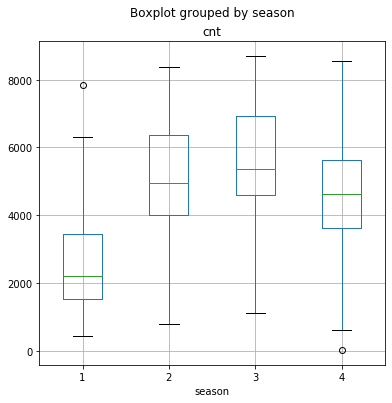

In [15]:
# Create a boxplot
# 1 is spring, 2 is summer, 3 is fall, and 4 is winter
data.boxplot('cnt', by='season', figsize=(6, 6))

### 2.2 Calculate ANOVA using statsmodel

In [17]:
# we need to conduct a little bit feature engineering to encode
seasons = {1: 'spring',
           2: 'summer',
           3: 'fall',
           4: 'winter'
           }
data['season_cat'] = data.season.map(seasons)

In [32]:
data.season_cat

0      spring
1      spring
2      spring
3      spring
4      spring
5      spring
6      spring
7      spring
8      spring
9      spring
10     spring
11     spring
12     spring
13     spring
14     spring
15     spring
16     spring
17     spring
18     spring
19     spring
20     spring
21     spring
22     spring
23     spring
24     spring
25     spring
26     spring
27     spring
28     spring
29     spring
        ...  
701    winter
702    winter
703    winter
704    winter
705    winter
706    winter
707    winter
708    winter
709    winter
710    winter
711    winter
712    winter
713    winter
714    winter
715    winter
716    winter
717    winter
718    winter
719    winter
720    spring
721    spring
722    spring
723    spring
724    spring
725    spring
726    spring
727    spring
728    spring
729    spring
730    spring
Name: season_cat, Length: 731, dtype: object

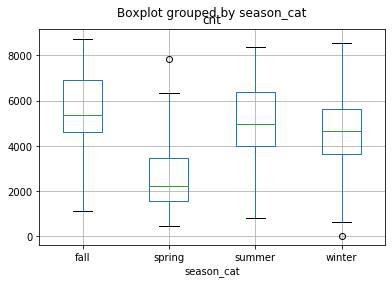

In [19]:
data.boxplot('cnt', by='season_cat')

# Let's fit an OLS model

In [8]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [9]:
anova_season = ols('cnt~season_cat', data=data).fit()
anova_season.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     128.8
Date:                Mon, 30 Dec 2019   Prob (F-statistic):           6.72e-67
Time:                        09:54:19   Log-Likelihood:                -6413.9
No. Observations:                 731   AIC:                         1.284e+04
Df Residuals:                     727   BIC:                         1.285e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             5644.3032    114.407     49.335      0.000    5419.696    5868.910
season_cat[T.spring] -3040.1706    163.352    -18.611      0.000   -3360.869   -2719.472
season_cat[T.summer]  -651.9717    162.673     -4.008      0.000    -971.336    -332.608
season_cat[T.winter]  -916.1403    164.052     -5.584      0.000   -1238.213    -594.068
==============================================================================
Omnibus:                        3.050   Durbin-Watson:                   0.469
Prob(Omnibus):                  0.218   Jarque-Bera (JB):                2.765
Skew:                           0.080   Prob(JB):                        0.251
Kurtosis:                       2.745   Cond. No.                         4.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# examine the anova table
anova_table = sm.stats.anova_lm(anova_season, type=2)
print(anova_table)

               df        sum_sq       mean_sq           F        PR(>F)
season_cat    3.0  9.505959e+08  3.168653e+08  128.769622  6.720391e-67
Residual    727.0  1.788940e+09  2.460715e+06         NaN           NaN


#### Next steps
Just because we have rejected the null hypothesis, it doesn't mean we have conclusively showed which group is significantly different from which - remember, the alternative hypothesis is "the null is not true". 

We need to conduct post hoc tests for multiple comparison to find out which groups are different, the most prominent post hoc tests are:
- LSD (Least significant difference)
    - $t\sqrt \frac{MSE}{n^2}$
- Tukey's HSD 
    - $q\sqrt \frac{MSE}{n}$
    
After calculating a value for LSD or HSD, we compare each pair wise mean difference with the LSD or HSD difference. If the pairwise mean difference exceeds the LSD/HSD, then they are significantly different.

In [34]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [35]:
mc = MultiComparison(data['cnt'], data['season'])
mc_results = mc.tukeyhsd()
print(mc_results)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff p-adj    lower      upper   reject
----------------------------------------------------------
     1      2 2388.1989  0.001  1965.3265 2811.0714   True
     1      3 3040.1706  0.001  2619.5349 3460.8063   True
     1      4 2124.0303  0.001  1697.6383 2550.4224   True
     2      3  651.9717  0.001   233.0867 1070.8566   True
     2      4 -264.1686 0.3792  -688.8337  160.4965  False
     3      4 -916.1403  0.001 -1338.5781 -493.7025   True
----------------------------------------------------------


In [31]:
mc_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,2388.1989,0.001,1965.3265,2811.0714,True
1,3,3040.1706,0.001,2619.5349,3460.8063,True
1,4,2124.0303,0.001,1697.6383,2550.4224,True
2,3,651.9717,0.001,233.0867,1070.8566,True
2,4,-264.1686,0.3792,-688.8337,160.4965,False
3,4,-916.1403,0.001,-1338.5781,-493.7025,True
